___

<a href='https://matplotlib.org/'> <img src='https://upload.wikimedia.org/wikipedia/en/thumb/5/56/Matplotlib_logo.svg/1280px-Matplotlib_logo.svg.png' /></a>
___
# Matplotlib - Descripcion general

## Introduction

Matplotlib es la biblioteca "abuela" de visualización de datos con Python. Fue creado por John Hunter. Lo creó para intentar replicar las capacidades de trazado de MatLab (otro lenguaje de programación) en Python. Entonces, si está familiarizado con matlab, matplotlib le resultará natural.

Es una excelente biblioteca de gráficos 2D y 3D para generar figuras científicas.

Algunas de las principales ventajas de Matplotlib son:

* Generalmente es fácil comenzar con gráficos simples.
* Soporte para etiquetas y textos personalizados
* Gran control de todos los elementos de una figura.
* Salida de alta calidad en muchos formatos
* Muy personalizable en general
Matplotlib le permite crear figuras reproducibles mediante programación. ¡Aprendamos a usarlo! Antes de continuar con esta conferencia, le animo a que explore la página web oficial de Matplotlib: http://matplotlib.org/

## Instalación 

Primero deberá instalar matplotlib con:

    conda install matplotlib
o
    pip install matplotlib
    
## Importando

Importe el modulo `matplotlib.pyplot` con el nombre `plt`(de forma ordenada):

In [ ]:
import sys
!{sys.executable} -m pip install matplotlib

In [14]:
import matplotlib.pyplot as plt

También necesitará usar esta línea para ver los gráficos en el notebook:

In [12]:
%matplotlib inline

Esa línea es solo para cuadernos jupyter, si está usando otro editor, usará: **plt.show()** al final de todos sus comandos de trazado para que la figura aparezca en otra ventana.

# Ejemplo Básico

### Ejemplo

Veamos un ejemplo muy simple usando dos matrices Numpy. También se puede usar listas, pero lo más probable es que esté pasando matrices Numpy o columnas Pandas (que esencialmente también se comportan como matrices).

**Los datos que queremos graficar:**

In [7]:
"""
linspace() crea un array, que estará formado por una cantidad de valores dada y 
que quedará equiespaciada dentro de los limites dados, o sea el valor inicial y el valor final.
"""
import numpy as np
x = np.linspace(0, 5, 11)
y = x ** 2

In [8]:
x

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

In [9]:
y

array([ 0.  ,  0.25,  1.  ,  2.25,  4.  ,  6.25,  9.  , 12.25, 16.  ,
       20.25, 25.  ])

## Comandos básicos de Matplotlib

Podemos crear un diagrama de línea muy simple usando lo siguiente:

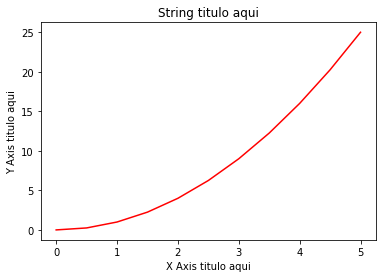

In [15]:
plt.plot(x, y, 'r') # 'r' es el color rojo
plt.xlabel('X Axis titulo aqui')
plt.ylabel('Y Axis titulo aqui')
plt.title('String titulo aqui')
plt.show()

## Creando Multiplots sobre el mismo lienzo

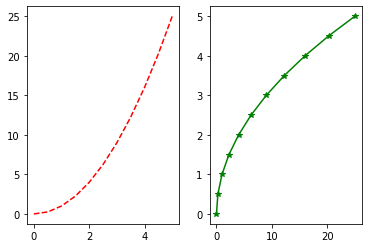

In [16]:
# plt.subplot(nrows, ncols, plot_number)
plt.subplot(1,2,1)
plt.plot(x, y, 'r--') # Más sobre las opciones de color más adelante
plt.subplot(1,2,2)
plt.plot(y, x, 'g*-');

___
# Método orientado a objetos de Matplotlib
Ahora que hemos visto los conceptos básicos, analicemos todo con una introducción más formal de la API orientada a objetos de **Matplotlib**. Esto significa que crearemos una instancia de los objetos de figura y luego llamaremos a métodos o atributos de ese objeto.

## Introducción al método orientado a objetos

La idea principal al usar el método orientado a objetos más formal es crear objetos de figura y luego simplemente llamar a métodos o atributos fuera de ese objeto. Este enfoque es más visible cuando se trata de un espacio que tiene varios gráficos.

Para comenzar, creamos una instancia de figura. Entonces podemos agregar ejes a esa figura:

Text(0.5, 1.0, 'Set Titulo')

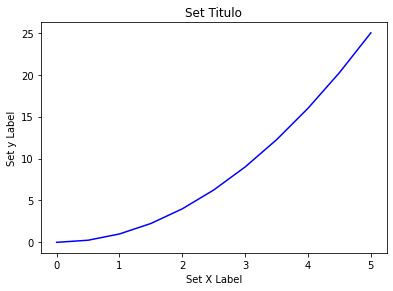

In [17]:
# Creacion de Plot (figura vacia)
fig = plt.figure()

# Adicionar conjunto de ejes a la figura
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # izquierda,fondo, ancho, alto (rango 0 a 1)

# Plot en ese conjunto de ejes
axes.plot(x, y, 'b')
axes.set_xlabel('Set X Label') # Observe el uso de set_ para comenzar los métodos
axes.set_ylabel('Set y Label')
axes.set_title('Set Titulo')

El código es un poco más complicado, pero la ventaja es que ahora tenemos el control total de dónde se colocan los ejes de la grafica y podemos agregar fácilmente más de un eje a la figura:

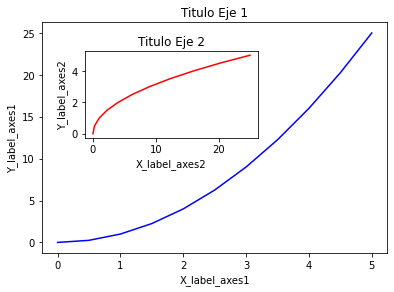

In [18]:
# Crea figura en blanco
fig = plt.figure()

axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # ejes principales
axes2 = fig.add_axes([0.2, 0.5, 0.4, 0.3]) # ejes insertados

# Ejes de figuras más grandes 1
axes1.plot(x, y, 'b')
axes1.set_xlabel('X_label_axes1')
axes1.set_ylabel('Y_label_axes1')
axes1.set_title('Titulo Eje 1')

# Insertar ejes de figura 2
axes2.plot(y, x, 'r')
axes2.set_xlabel('X_label_axes2')
axes2.set_ylabel('Y_label_axes2')
axes2.set_title('Titulo Eje 2');

## subplots()

El objeto plt.subplots () actuará como un administrador de ejes más automático.

Casos de uso básicos:

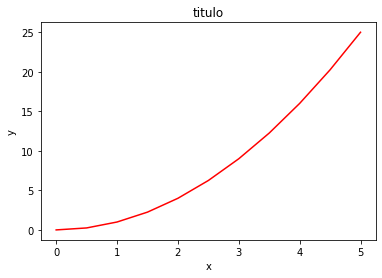

In [19]:
# Use similar a plt.figure () 
fig, axes = plt.subplots()

# Ahora use el objeto de ejes para agregar cosas para el plot
axes.plot(x, y, 'r')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('titulo');

Luego, puede especificar el número de filas y columnas al crear el objeto subplots ():

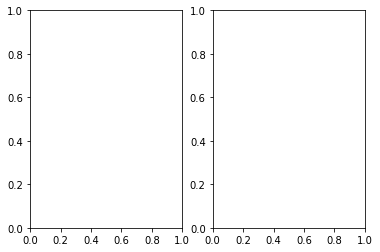

In [20]:
# Lienzo vacío de subplots 1 por 2
fig, axes = plt.subplots(nrows=1, ncols=2)

In [21]:
# Axes es una matriz de ejes para el plot
axes

array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)

Podemos iterar a través de esta matriz:

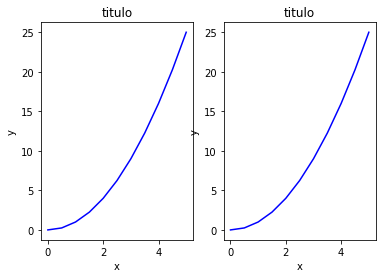

In [22]:
for ax in axes:
    ax.plot(x, y, 'b')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('titulo')

# Mostrar el objeto figura
fig

Un problema común con **matplolib** es la superposición de subtramas o figuras. Podemos usar el método **fig.tight_layout()** o **plt.tight_layout()**, que ajusta automáticamente las posiciones de los ejes en el espacio de la figura para que no haya contenido superpuesto:

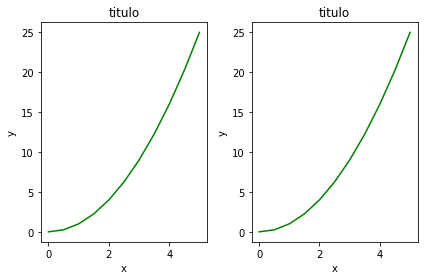

In [23]:
fig, axes = plt.subplots(nrows=1, ncols=2)

for ax in axes:
    ax.plot(x, y, 'g')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('titulo')

fig    
plt.tight_layout() # separa los subplots un poco

### Tamaño de la figura, relación de aspecto y DPI

Matplotlib permite especificar la relación de aspecto, DPI y el tamaño de la figura cuando se crea el objeto Figura. Puede utilizar los argumentos de palabras clave figsize y dpi.

* `figsize` es una tupla del ancho y alto de la figura en pulgadas
* `dpi` es el punto por pulgada (píxel por pulgada).

**DPI:**  Dots Per Inch, puntos por pulgada (o píxeles por pulgada).

Por ejemplo:

In [24]:
fig = plt.figure(figsize=(8,4), dpi=100)

<Figure size 800x400 with 0 Axes>

Los mismos argumentos también se pueden pasar a la función `subplots`:

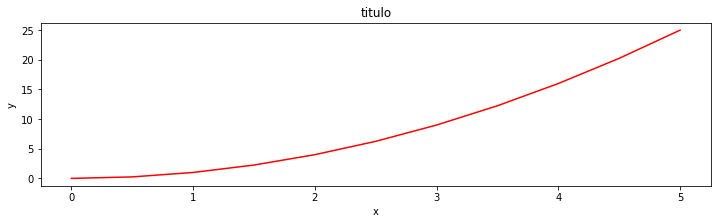

In [25]:
fig, axes = plt.subplots(figsize=(12,3))

axes.plot(x, y, 'r')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('titulo');

## Guardando figuras
Matplotlib puede generar resultados de alta calidad en varios formatos, incluidos PNG, JPG, EPS, SVG, PGF y PDF.

Para guardar una figura en un archivo podemos usar el método `savefig` en la `Figura` clase:

In [26]:
fig.savefig("filename.png")

Aquí también podemos especificar opcionalmente el DPI y elegir entre diferentes formatos de salida:

In [27]:
fig.savefig("filename.png", dpi=200)

____
## Leyendas, etiquetas y títulos

Ahora que hemos cubierto los conceptos básicos de cómo crear un grafico y agregar instancias en sus ejes, veamos cómo insertar títulos, etiquetas de eje y leyendas.

**Títulos de Graficos**

Se puede agregar un título a cada instancia de eje en un grafico. Para establecer el título, use el método **set_title** en la instancia de ejes:

In [28]:
ax.set_title("titulo");

**Etiquetas de eje**

Del mismo modo, con los métodos **set_xlabel** y **set_ylabel**, podemos establecer las etiquetas de los ejes X e Y:

In [29]:
ax.set_xlabel("x")
ax.set_ylabel("y");

### Leyendas

Se puede usar el argumento de palabra clave **label="label text"** cuando se agregan gráficos u otros objetos a la figura, y luego usar el método **legend** sin argumentos para agregar la leyenda a la figura:

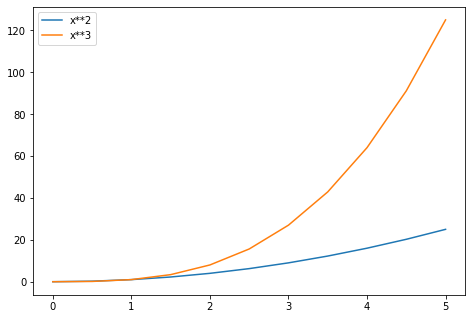

In [30]:
fig = plt.figure()

ax = fig.add_axes([0,0,1,1])

ax.plot(x, x**2, label="x**2")
ax.plot(x, x**3, label="x**3")
ax.legend()

¡Observa cómo la leyenda se superpone como parte de la grafica real!

La función **legend** toma un argumento de palabra clave opcional **loc** que se puede usar para especificar en qué parte de la figura se dibujará la leyenda. Los valores permitidos de **loc** son códigos numéricos para los distintos lugares donde se puede dibujar la leyenda. Consultar la [documentation page](http://matplotlib.org/users/legend_guide.html#legend-location) para obtener más detalles. Algunos de los valores de **loc** más comunes son:

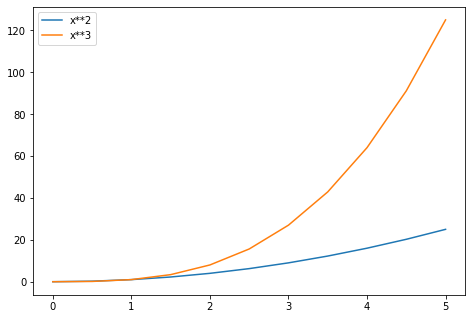

In [31]:
# Muchas opciones....

ax.legend(loc=1) # esquina superior derecha
ax.legend(loc=2) # esquina superior izquierda
ax.legend(loc=3) # esquina inferior izquierda
ax.legend(loc=4) # esquina inferior derecha

# .. hay muchas más opciones disponibles

# Lo más común para elegir
ax.legend(loc=0) # deja que matplotlib decida la ubicación óptima
fig

## Configuración de colores, anchos de línea, tipos de línea

Matplotlib ofrece muchas opciones para personalizar colores, anchos de línea y tipos de línea.

### Colores con sintaxis similar a MatLab 

Con matplotlib, podemos definir los colores de las líneas y otros elementos gráficos de varias formas. En primer lugar, podemos usar la sintaxis similar a MATLAB, donde `'b'`significa azul,`'g'`'significa verde, etc. También se admite la API de MATLAB para seleccionar estilos de línea: donde, por ejemplo, 'b.-' significa una línea azul con puntos:

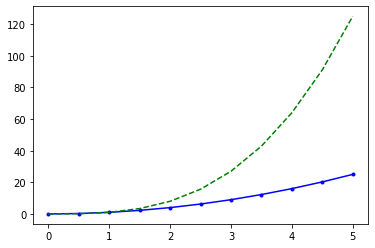

In [32]:
# Color y estilo de línea de estilo MATLAB 
fig, ax = plt.subplots()
ax.plot(x, x**2, 'b.-') # línea azul con puntos
ax.plot(x, x**3, 'g--') # línea discontinua verde

### Colores con el parámetro color = 

También podemos definir colores por sus nombres o códigos hexadecimales RGB y, opcionalmente, proporcionar un valor alfa utilizando los argumentos de la palabra clave `color` y `alpha`. Alfa indica opacidad.

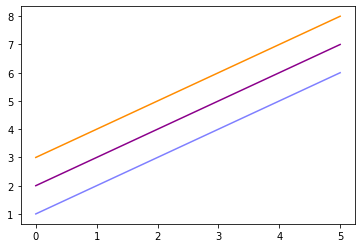

In [33]:
fig, ax = plt.subplots()

ax.plot(x, x+1, color="blue", alpha=0.5) # semitransparente
ax.plot(x, x+2, color="#8B008B")        # codigo RGB hex 
ax.plot(x, x+3, color="#FF8C00")        # codigo RGB hex 

### Estilos de línea y marcador

Para cambiar el ancho de línea, podemos usar el argumento de palabra clave `linewidth` o `lw`. El estilo de línea se puede seleccionar usando los argumentos de palabra clave `linestyle` o `ls`:

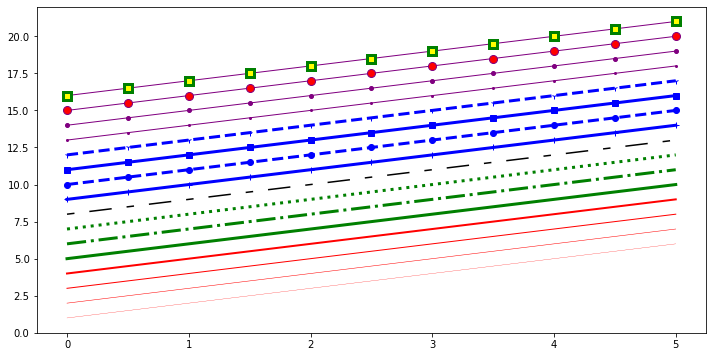

In [34]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(x, x+1, color="red", linewidth=0.25)
ax.plot(x, x+2, color="red", linewidth=0.50)
ax.plot(x, x+3, color="red", linewidth=1.00)
ax.plot(x, x+4, color="red", linewidth=2.00)

# posibles opciones de tipo de línea ‘-‘, ‘–’, ‘-.’, ‘:’, 
ax.plot(x, x+5, color="green", lw=3, linestyle='-')
ax.plot(x, x+6, color="green", lw=3, ls='-.')
ax.plot(x, x+7, color="green", lw=3, ls=':')

# guión personalizado
line, = ax.plot(x, x+8, color="black", lw=1.50)
line.set_dashes([5, 10, 15, 10]) # formato: longitud de la línea, longitud del espacio, ...

# posibles símbolos de marcador: marcador = '+', 'o', '*', 's', ',', '.', '1', '2', '3', '4', ...
ax.plot(x, x+ 9, color="blue", lw=3, ls='-', marker='+')
ax.plot(x, x+10, color="blue", lw=3, ls='--', marker='o')
ax.plot(x, x+11, color="blue", lw=3, ls='-', marker='s')
ax.plot(x, x+12, color="blue", lw=3, ls='--', marker='1')

# tamaño y color del marcador
ax.plot(x, x+13, color="purple", lw=1, ls='-', marker='o', markersize=2)
ax.plot(x, x+14, color="purple", lw=1, ls='-', marker='o', markersize=4)
ax.plot(x, x+15, color="purple", lw=1, ls='-', marker='o', markersize=8, markerfacecolor="red")
ax.plot(x, x+16, color="purple", lw=1, ls='-', marker='s', markersize=8, 
        markerfacecolor="yellow", markeredgewidth=3, markeredgecolor="green");

### Control sobre la apariencia del eje

En esta sección veremos cómo controlar las propiedades de tamaño del eje en una figura de matplotlib.

## Trazar rango

Podemos configurar los rangos de los ejes usando los métodos `set_ylim` y `set_xlim` en el objeto de eje, o `axis('tight')` para obtener automáticamente rangos de ejes "ajustados":

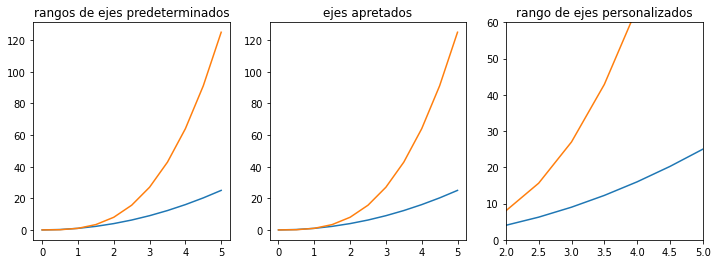

In [35]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].plot(x, x**2, x, x**3)
axes[0].set_title("rangos de ejes predeterminados")

axes[1].plot(x, x**2, x, x**3)
axes[1].axis('tight')
axes[1].set_title("ejes apretados")

axes[2].plot(x, x**2, x, x**3)
axes[2].set_ylim([0, 60])
axes[2].set_xlim([2, 5])
axes[2].set_title("rango de ejes personalizados");

# Tipos de Plot especiales

Hay muchos gráficos especializados que podemos crear, como gráficos de barras, histogramas, gráficos de dispersión y mucho más. La mayoría de estos tipos de gráficos los crearemos utilizando **seaborn**, una biblioteca de gráficos estadísticos para Python. Pero aquí hay algunos ejemplos de este tipo de gráficos:

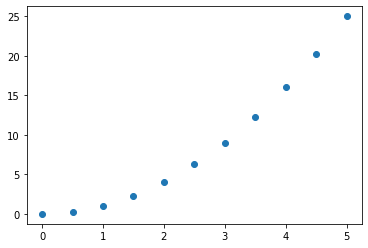

In [36]:
plt.scatter(x,y)

(array([11.,  8., 10.,  9., 10.,  8., 13., 10.,  9., 12.]),
 array([  8. , 106.8, 205.6, 304.4, 403.2, 502. , 600.8, 699.6, 798.4,
        897.2, 996. ]),
 <BarContainer object of 10 artists>)

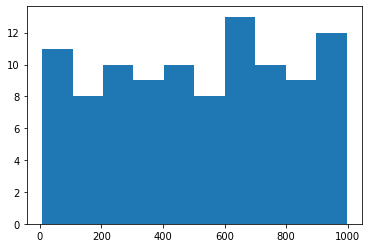

In [37]:
from random import sample
data = sample(range(1, 1000), 100)
plt.hist(data)

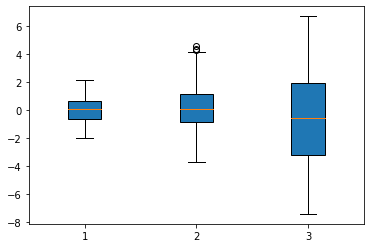

In [38]:
data = [np.random.normal(0, std, 100) for std in range(1, 4)]

# rectangular box plot
plt.boxplot(data,vert=True,patch_artist=True);   



* http://www.matplotlib.org : La página web del proyecto para matplotlib.
* https://github.com/matplotlib/matplotlib : el código fuente de matplotlib.
* http://matplotlib.org/gallery.html : una gran galería que muestra varios tipos de gráficos que matplotlib puede crear. ¡Muy recomendable!
* http://www.loria.fr/~rougier/teaching/matplotlib : Un buen tutorial de matplotlib
* http://scipy-lectures.github.io/matplotlib/matplotlib.html :Another good matplotlib reference.
